# Inteligencia Artificial / Maestría MACC
## Miniproyecto 2: Buscaminas con Lógica Proposicional
#### Presentado por: Juan David Rojas \& Oscar Velasco
#### Presentado a: Edgar José Andrade
### 01 de Noviembre de 2021

In [ ]:
from logica import *
from minesweeper import *
from time import sleep, time
from IPython.display import display, clear_output
from PIL import Image

import random
import os
import pandas as pd

## Implementación Ambiente de Tarea

In [ ]:
class Agente:

    def __init__(self, mundo, base_conocimiento = None, descriptor = None):
        self.mundo = mundo
        self.base_conocimiento = base_conocimiento
        self.cods = descriptor


    def make_percept_sentence(self):
        # Crea una conjuncion de literales para añadir a la base de datos
        literales = ''
        counts = self.mundo.counts
        clicks = self.mundo.clicked
        flags = self.mundo.flags
        for j,(x,y) in enumerate(zip(*np.where(clicks == True))):
            literales += '-' + self.cods.P([x,y,0])
            if counts[x,y] != 0:
                literales += 'Y' + self.cods.P([x,y,counts[x,y]])
            if j!= len(np.where(clicks == True)[0])-1:
                literales += 'Y'
        for x,y in zip(*np.where(flags!=0)):
            literales += 'Y' + self.cods.P([x,y,0])

        return literales
    

    def valida(self, posicion):
        if (posicion[0] > -1) & (posicion[0]<self.mundo.width) & (posicion[1]>-1) & (posicion[1]<self.mundo.height):
            return True


    def adyacentes(self, casilla):
        i, j = casilla
        direcciones = np.array([[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]])
        adyacentes = [(posicion[0], posicion[1]) for posicion in direcciones + [i, j] if self.valida(posicion)]
        return adyacentes
    

    def crear_formulas_seguras(self):
        formulas_minas = []
        for (i,j) in self.casillas_reglas():
            if self.mundo.counts[i,j]==1:
                formulas_minas += self.formulas_una_mina((i,j))
            elif self.mundo.counts[i,j]==2:
                formulas_minas += self.formulas_dos_minas((i,j))
            elif self.mundo.counts[i,j]==3:
                formulas_minas += self.formulas_tres_minas((i,j))
            elif self.mundo.counts[i,j]==4:
                formulas_minas += self.formulas_cuatro_minas((i,j))
            else:
                formulas_minas += self.formulas_cinco_minas((i,j))
        return formulas_minas
    

    def formulas_una_mina(self, casilla):
        i, j = casilla
        formulas_una_mina = []
        for k in self.adyacentes((i,j)):
            cadena = self.cods.P([i,j,1])+'Y'+self.cods.P([k[0],k[1],0])
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                formulas_una_mina.append(cadena+'>-'+self.cods.P([l[0],l[1],0]))
        return formulas_una_mina
    

    def formulas_dos_minas(self, casilla):
        i, j = casilla
        formulas_dos_minas = []
        for k in self.adyacentes((i,j)):
            cadena = self.cods.P([i,j,2])+'Y'+self.cods.P([k[0],k[1],0])
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    formulas_dos_minas.append(cadena+'Y'+self.cods.P([l[0],l[1],0])+'>-'+self.cods.P([n[0],n[1],0]))
        return formulas_dos_minas
    

    def formulas_tres_minas(self, casilla):
        i, j = casilla
        formulas_tres_minas = []
        for k in self.adyacentes((i,j)):
            cadena = self.cods.P([i,j,3])+'Y'+self.cods.P([k[0],k[1],0])
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    aux3 = aux2.copy()
                    aux3.remove(n)
                    for m in aux3:
                        formulas_tres_minas.append(cadena+'Y'+self.cods.P([l[0],l[1],0])+
                                                   'Y'+self.cods.P([n[0],n[1],0])+'>-'+self.cods.P([m[0],m[1],0]))
        return formulas_tres_minas
    

    def formulas_cuatro_minas(self, casilla):
        i, j = casilla
        formulas_cuatro_minas = []
        for k in self.adyacentes((i,j)):
            cadena = self.cods.P([i,j,4])+'Y'+self.cods.P([k[0],k[1],0])
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    aux3 = aux2.copy()
                    aux3.remove(n)
                    for m in aux3:
                        aux4 = aux3.copy()
                        aux4.remove(m)
                        for p in aux4:
                            formulas_cuatro_minas.append(cadena+'Y'+self.cods.P([l[0],l[1],0])+
                                                   'Y'+self.cods.P([n[0],n[1],0])+'Y'+self.cods.P([m[0],m[1],0])+
                                                        '>-'+self.cods.P([p[0],p[1],0]))

        return formulas_cuatro_minas

    
    def formulas_cinco_minas(self, casilla):
        i, j = casilla
        formulas_cinco_minas = []
        for k in self.adyacentes((i,j)):
            cadena = self.cods.P([i,j,5])+'Y'+self.cods.P([k[0],k[1],0])
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    aux3 = aux2.copy()
                    aux3.remove(n)
                    for m in aux3:
                        aux4 = aux3.copy()
                        aux4.remove(m)
                        for p in aux4:
                            aux5 = aux4.copy()
                            aux5.remove(p)
                            for q in aux5:
                                formulas_cinco_minas.append(cadena+'Y'+self.cods.P([l[0],l[1],0])+
                                                   'Y'+self.cods.P([n[0],n[1],0])+'Y'+self.cods.P([m[0],m[1],0])+
                                                        'Y'+self.cods.P([p[0],p[1],0])+'>-'+self.cods.P([q[0],q[1],0]))

        return formulas_cinco_minas
    

    def crear_formulas_flags(self):
        formulas_seguras = []
        for (i,j) in self.casillas_reglas():
            if self.mundo.counts[i,j]==1:
                formulas_seguras += self.formulas_una_segura((i,j))
            elif self.mundo.counts[i,j]==2:
                formulas_seguras += self.formulas_dos_seguras((i,j))
            elif self.mundo.counts[i,j]==3:
                formulas_seguras += self.formulas_tres_seguras((i,j))
            elif self.mundo.counts[i,j]==4:
                formulas_seguras += self.formulas_cuatro_seguras((i,j))
            else:
                formulas_seguras += self.formulas_cinco_seguras((i,j))
        return formulas_seguras
    

    def formulas_una_segura(self, casilla):
        i, j = casilla
        formulas_una_segura = []
        for k in self.adyacentes((i,j)):
            cadena = self.cods.P([i,j,1])
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                cadena +='Y-'+self.cods.P([l[0],l[1],0])
            formulas_una_segura.append(cadena+'>'+self.cods.P([k[0],k[1],0]))
                                       
        return formulas_una_segura
    

    def formulas_dos_seguras(self, casilla):
        i, j = casilla
        formulas_dos_seguras = []
        for k in self.adyacentes((i,j)):
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                cadena = self.cods.P([i,j,2])
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    cadena +='Y-'+self.cods.P([n[0],n[1],0])
                if cadena+'>'+self.cods.P([l[0],l[1],0]) not in formulas_dos_seguras:
                    formulas_dos_seguras.append(cadena+'>'+self.cods.P([l[0],l[1],0]))
                if cadena+'>'+self.cods.P([k[0],k[1],0]) not in formulas_dos_seguras:
                    formulas_dos_seguras.append(cadena+'>'+self.cods.P([k[0],k[1],0]))
                                       
        return formulas_dos_seguras
    

    def formulas_tres_seguras(self, casilla):
        i, j = casilla
        formulas_tres_seguras = []
        for k in self.adyacentes((i,j)):
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    cadena = self.cods.P([i,j,3])
                    aux3 = aux2.copy()
                    aux3.remove(n)
                    for m in aux3:
                        cadena +='Y-'+self.cods.P([m[0],m[1],0])
                    if cadena+'>'+self.cods.P([n[0],n[1],0]) not in formulas_tres_seguras:
                        formulas_tres_seguras.append(cadena+'>'+self.cods.P([n[0],n[1],0]))
                    if cadena+'>'+self.cods.P([l[0],l[1],0]) not in formulas_tres_seguras:
                        formulas_tres_seguras.append(cadena+'>'+self.cods.P([l[0],l[1],0]))
                    if cadena+'>'+self.cods.P([k[0],k[1],0]) not in formulas_tres_seguras:
                        formulas_tres_seguras.append(cadena+'>'+self.cods.P([k[0],k[1],0]))
                         
        return formulas_tres_seguras
    

    def formulas_cuatro_seguras(self, casilla):
        i, j = casilla
        formulas_cuatro_seguras = []
        for k in self.adyacentes((i,j)):
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    aux3 = aux2.copy()
                    aux3.remove(n)
                    for m in aux3:
                        cadena = self.cods.P([i,j,4])
                        aux4 = aux3.copy()
                        aux4.remove(m)
                        for p in aux4:
                            cadena +='Y-'+self.cods.P([p[0],p[1],0])
                        if cadena+'>'+self.cods.P([m[0],m[1],0]) not in formulas_cuatro_seguras:
                            formulas_cuatro_seguras.append(cadena+'>'+self.cods.P([m[0],m[1],0]))
                        if cadena+'>'+self.cods.P([n[0],n[1],0]) not in formulas_cuatro_seguras:
                            formulas_cuatro_seguras.append(cadena+'>'+self.cods.P([n[0],n[1],0]))
                        if cadena+'>'+self.cods.P([l[0],l[1],0]) not in formulas_cuatro_seguras:
                            formulas_cuatro_seguras.append(cadena+'>'+self.cods.P([l[0],l[1],0]))
                        if cadena+'>'+self.cods.P([k[0],k[1],0]) not in formulas_cuatro_seguras:
                            formulas_cuatro_seguras.append(cadena+'>'+self.cods.P([k[0],k[1],0]))
                         
        return formulas_cuatro_seguras


    def formulas_cinco_seguras(self, casilla):
        i, j = casilla
        formulas_cinco_seguras = []
        for k in self.adyacentes((i,j)):
            aux = self.adyacentes((i,j))
            aux.remove(k)
            for l in aux:
                aux2 = aux.copy()
                aux2.remove(l)
                for n in aux2:
                    aux3 = aux2.copy()
                    aux3.remove(n)
                    for m in aux3:
                        aux4 = aux3.copy()
                        aux4.remove(m)
                        for p in aux4:
                            cadena = self.cods.P([i,j,5])
                            aux5 = aux4.copy()
                            aux5.remove(p)
                            for q in aux5:
                                cadena +='Y-'+self.cods.P([q[0],q[1],0])
                            if cadena+'>'+self.cods.P([p[0],p[1],0]) not in formulas_cinco_seguras:
                                formulas_cinco_seguras.append(cadena+'>'+self.cods.P([p[0],p[1],0]))
                            if cadena+'>'+self.cods.P([m[0],m[1],0]) not in formulas_cinco_seguras:
                                formulas_cinco_seguras.append(cadena+'>'+self.cods.P([m[0],m[1],0]))
                            if cadena+'>'+self.cods.P([n[0],n[1],0]) not in formulas_cinco_seguras:
                                formulas_cinco_seguras.append(cadena+'>'+self.cods.P([n[0],n[1],0]))
                            if cadena+'>'+self.cods.P([l[0],l[1],0]) not in formulas_cinco_seguras:
                                formulas_cinco_seguras.append(cadena+'>'+self.cods.P([l[0],l[1],0]))
                            if cadena+'>'+self.cods.P([k[0],k[1],0]) not in formulas_cinco_seguras:
                                formulas_cinco_seguras.append(cadena+'>'+self.cods.P([k[0],k[1],0]))
                         
        return formulas_cinco_seguras
    

    def casillas_reglas(self):
        clicks = self.mundo.clicked 
        flags = self.mundo.flags
        reglas = []
        for casilla in set(zip(*np.where(clicks == False))).difference(zip(*np.where(flags != 0))):
            reglas+= [pos for pos in set(zip(*np.where(clicks == True))).intersection(set(self.adyacentes(casilla)))]
        return set(reglas)
    

    def casillas_evaluar(self):
        clicks = self.mundo.clicked 
        flags = self.mundo.flags
        evaluar = []
        for casilla in self.casillas_reglas():
            evaluar += [pos for pos in set(zip(*np.where(clicks == False))).intersection(set(self.adyacentes(casilla))).difference(zip(*np.where(flags != 0)))]
        return set(evaluar)
    

    def casillas_aleatoria(self):
        clicks = self.mundo.clicked 
        flags = self.mundo.flags
        aleatoria = (set(zip(*np.where(clicks == False))).difference(set(zip(*np.where(flags != 0))))).difference(set(self.casillas_evaluar()))
        return aleatoria
    

    def adyacentes_seguras(self):
        casillas_seguras = []
        for i,j in self.casillas_evaluar():
            objetivo = '-'+self.cods.P([i,j,0])
            resultado = ASK(objetivo, 'success', self.base_conocimiento)
            if resultado:
                casillas_seguras.append((i,j))
                #return (i,j)
        return casillas_seguras
        #return False
    
    
    def adyacentes_flags(self):
        casillas_flags = []
        for i,j in self.casillas_evaluar():
            objetivo = self.cods.P([i,j,0])
            resultado = ASK(objetivo, 'success', self.base_conocimiento)
            if resultado:
                casillas_flags.append((i,j))
                #return (i,j)
        return casillas_flags
        #return False

## Solución del Problema

### Tablero 5x5

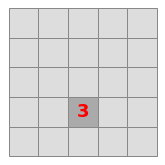

In [ ]:
# Tablero Inicial
info = 6
filas = 5
columnas = 5
minas = int((filas * columnas) * 0.16)
IenCasilla = Descriptor([columnas, filas, info])
ms = MineSweeper(filas, columnas, minas)
agente = Agente(ms, descriptor=IenCasilla)
i,j = random.choice(list(agente.casillas_aleatoria()))
agente.mundo._click_square(i,j)
plt.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, 1))

Ganaste!


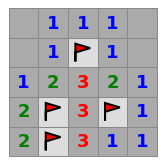

In [ ]:
k = 2
while True:
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para banderas
    agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
    agente.base_conocimiento.TELL(estado_actual)
    lista1 = agente.adyacentes_flags()
    ## Flag si son bombas
    for i,j in lista1:
        agente.mundo._toggle_mine_flag(i,j)
           
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para casillas seguras
    agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
    agente.base_conocimiento.TELL(estado_actual)
    lista2 = agente.adyacentes_seguras()
    ## Clicks si son seguras
    for i,j in lista2:
        agente.mundo._click_square(i,j)
        
    ## Si no hace nada se escoge una aleatoria
    if len(lista1)==0 & len(lista2)==0:
        if len(agente.casillas_aleatoria()) != 0:
            i,j = random.choice(list(agente.casillas_aleatoria()))
            agente.mundo._click_square(i,j)
        elif len(agente.casillas_evaluar()) != 0:
            i,j = random.choice(list(agente.casillas_evaluar()))
            agente.mundo._click_square(i,j)
    
    ## Dibuja tablero
    #ms.fig.canvas.draw()
    #sleep(1)
    #clear_output(wait=True)
    agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, k))
    k += 1
    if agente.mundo.game_over == True:
        if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
            print('Ganaste!')
        else:
            print('Perdiste!')
        break

ms.fig

### Tablero 6x6

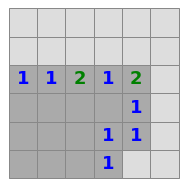

In [ ]:
# Tablero Inicial
info = 6
filas = 6
columnas = 6
minas = int((filas * columnas) * 0.16)
IenCasilla = Descriptor([columnas, filas, info])
ms = MineSweeper(filas, columnas, minas)
agente = Agente(ms, descriptor=IenCasilla)
i,j = random.choice(list(agente.casillas_aleatoria()))
agente.mundo._click_square(i,j)
plt.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, 1))

Ganaste!


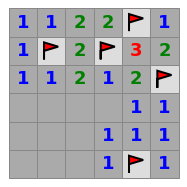

In [ ]:
k = 2
while True:
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para banderas
    agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
    agente.base_conocimiento.TELL(estado_actual)
    lista1 = agente.adyacentes_flags()
    ## Flag si son bombas
    for i,j in lista1:
        agente.mundo._toggle_mine_flag(i,j)
           
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para casillas seguras
    agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
    agente.base_conocimiento.TELL(estado_actual)
    lista2 = agente.adyacentes_seguras()
    ## Clicks si son seguras
    for i,j in lista2:
        agente.mundo._click_square(i,j)
        
    ## Si no hace nada se escoge una aleatoria
    if len(lista1)==0 & len(lista2)==0:
        if len(agente.casillas_aleatoria()) != 0:
            i,j = random.choice(list(agente.casillas_aleatoria()))
            agente.mundo._click_square(i,j)
        elif len(agente.casillas_evaluar()) != 0:
            i,j = random.choice(list(agente.casillas_evaluar()))
            agente.mundo._click_square(i,j)
    
    ## Dibuja tablero
    #ms.fig.canvas.draw()
    #sleep(1)
    #clear_output(wait=True)
    agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, k))
    k += 1
    if agente.mundo.game_over == True:
        if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
            print('Ganaste!')
        else:
            print('Perdiste!')
        break

ms.fig

### Tablero 7x7

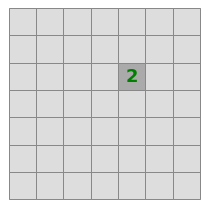

In [ ]:
# Tablero Inicial
info = 6
filas = 7
columnas = 7
minas = int((filas * columnas) * 0.16)
IenCasilla = Descriptor([columnas, filas, info])
ms = MineSweeper(filas, columnas, minas)
agente = Agente(ms, descriptor=IenCasilla)
i,j = random.choice(list(agente.casillas_aleatoria()))
agente.mundo._click_square(i,j)
plt.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, 1))

Ganaste!


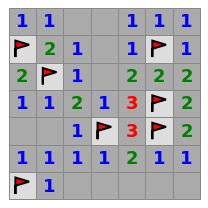

In [ ]:
k = 2
while True:
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para banderas
    agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
    agente.base_conocimiento.TELL(estado_actual)
    lista1 = agente.adyacentes_flags()
    ## Flag si son bombas
    for i,j in lista1:
        agente.mundo._toggle_mine_flag(i,j)
           
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para casillas seguras
    agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
    agente.base_conocimiento.TELL(estado_actual)
    lista2 = agente.adyacentes_seguras()
    ## Clicks si son seguras
    for i,j in lista2:
        agente.mundo._click_square(i,j)
        
    ## Si no hace nada se escoge una aleatoria
    if len(lista1)==0 & len(lista2)==0:
        if len(agente.casillas_aleatoria()) != 0:
            i,j = random.choice(list(agente.casillas_aleatoria()))
            agente.mundo._click_square(i,j)
        elif len(agente.casillas_evaluar()) != 0:
            i,j = random.choice(list(agente.casillas_evaluar()))
            agente.mundo._click_square(i,j)
    
    ## Dibuja tablero
    #ms.fig.canvas.draw()
    #sleep(1)
    #clear_output(wait=True)
    agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, k))
    k += 1
    if agente.mundo.game_over == True:
        if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
            print('Ganaste!')
        else:
            print('Perdiste!')
        break

ms.fig

### Tablero 8x8

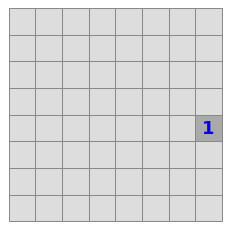

In [ ]:
# Tablero Inicial
info = 6
filas = 8
columnas = 8
minas = int((filas * columnas) * 0.16)
IenCasilla = Descriptor([columnas, filas, info])
ms = MineSweeper(filas, columnas, minas)
agente = Agente(ms, descriptor=IenCasilla)
i,j = random.choice(list(agente.casillas_aleatoria()))
agente.mundo._click_square(i,j)
plt.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, 1))

Ganaste!


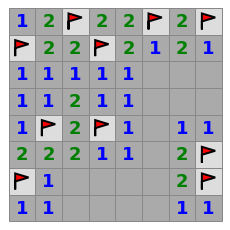

In [ ]:
k = 2
while True:
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para banderas
    agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
    agente.base_conocimiento.TELL(estado_actual)
    lista1 = agente.adyacentes_flags()
    ## Flag si son bombas
    for i,j in lista1:
        agente.mundo._toggle_mine_flag(i,j)
           
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para casillas seguras
    agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
    agente.base_conocimiento.TELL(estado_actual)
    lista2 = agente.adyacentes_seguras()
    ## Clicks si son seguras
    for i,j in lista2:
        agente.mundo._click_square(i,j)
        
    ## Si no hace nada se escoge una aleatoria
    if len(lista1)==0 & len(lista2)==0:
        if len(agente.casillas_aleatoria()) != 0:
            i,j = random.choice(list(agente.casillas_aleatoria()))
            agente.mundo._click_square(i,j)
        elif len(agente.casillas_evaluar()) != 0:
            i,j = random.choice(list(agente.casillas_evaluar()))
            agente.mundo._click_square(i,j)
    
    ## Dibuja tablero
    #ms.fig.canvas.draw()
    #sleep(1)
    #clear_output(wait=True)
    agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, k))
    k += 1
    if agente.mundo.game_over == True:
        if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
            print('Ganaste!')
        else:
            print('Perdiste!')
        break

ms.fig

### Tablero 9x9

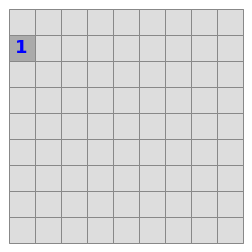

In [ ]:
# Tablero Inicial
info = 6
filas = 9
columnas = 9
minas = int((filas * columnas) * 0.16)
IenCasilla = Descriptor([columnas, filas, info])
ms = MineSweeper(filas, columnas, minas)
agente = Agente(ms, descriptor=IenCasilla)
i,j = random.choice(list(agente.casillas_aleatoria()))
agente.mundo._click_square(i,j)
plt.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, 1))

Ganaste!


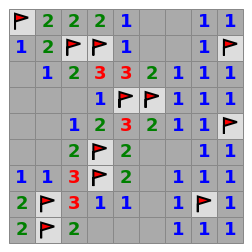

In [ ]:
k = 2
while True:
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para banderas
    agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
    agente.base_conocimiento.TELL(estado_actual)
    lista1 = agente.adyacentes_flags()
    ## Flag si son bombas
    for i,j in lista1:
        agente.mundo._toggle_mine_flag(i,j)
           
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para casillas seguras
    agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
    agente.base_conocimiento.TELL(estado_actual)
    lista2 = agente.adyacentes_seguras()
    ## Clicks si son seguras
    for i,j in lista2:
        agente.mundo._click_square(i,j)
        
    ## Si no hace nada se escoge una aleatoria
    if len(lista1)==0 & len(lista2)==0:
        if len(agente.casillas_aleatoria()) != 0:
            i,j = random.choice(list(agente.casillas_aleatoria()))
            agente.mundo._click_square(i,j)
        elif len(agente.casillas_evaluar()) != 0:
            i,j = random.choice(list(agente.casillas_evaluar()))
            agente.mundo._click_square(i,j)
    
    ## Dibuja tablero
    #ms.fig.canvas.draw()
    #sleep(1)
    #clear_output(wait=True)
    agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, k))
    k += 1
    if agente.mundo.game_over == True:
        if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
            print('Ganaste!')
        else:
            print('Perdiste!')
        break

ms.fig

### Tablero 10x10

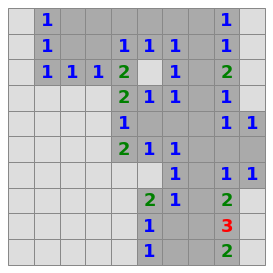

In [ ]:
# Tablero Inicial
info = 6
filas = 10
columnas = 10
minas = int((filas * columnas) * 0.16)
IenCasilla = Descriptor([columnas, filas, info])
ms = MineSweeper(filas, columnas, minas)
agente = Agente(ms, descriptor=IenCasilla)
i,j = random.choice(list(agente.casillas_aleatoria()))
agente.mundo._click_square(i,j)
plt.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, 1))

Ganaste!


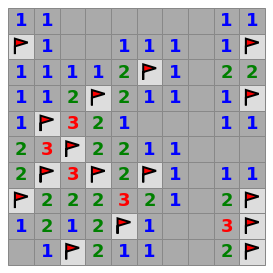

In [ ]:
k = 2
while True:
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para banderas
    agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
    agente.base_conocimiento.TELL(estado_actual)
    lista1 = agente.adyacentes_flags()
    ## Flag si son bombas
    for i,j in lista1:
        agente.mundo._toggle_mine_flag(i,j)
           
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para casillas seguras
    agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
    agente.base_conocimiento.TELL(estado_actual)
    lista2 = agente.adyacentes_seguras()
    ## Clicks si son seguras
    for i,j in lista2:
        agente.mundo._click_square(i,j)
        
    ## Si no hace nada se escoge una aleatoria
    if len(lista1)==0 & len(lista2)==0:
        if len(agente.casillas_aleatoria()) != 0:
            i,j = random.choice(list(agente.casillas_aleatoria()))
            agente.mundo._click_square(i,j)
        elif len(agente.casillas_evaluar()) != 0:
            i,j = random.choice(list(agente.casillas_evaluar()))
            agente.mundo._click_square(i,j)
    
    ## Dibuja tablero
    #ms.fig.canvas.draw()
    #sleep(1)
    #clear_output(wait=True)
    agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, k))
    k += 1
    if agente.mundo.game_over == True:
        if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
            print('Ganaste!')
        else:
            print('Perdiste!')
        break

ms.fig

### Tablero 16x16

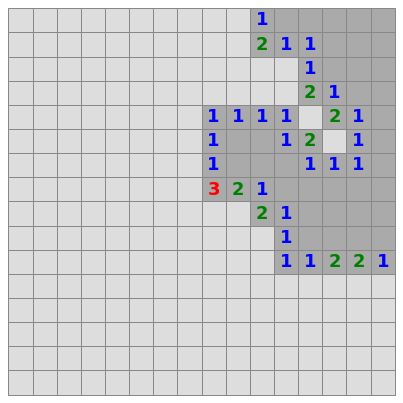

In [ ]:
# Tablero Inicial
info = 5
filas = 16
columnas = 16
minas = int((filas * columnas) * 0.16)
IenCasilla = Descriptor([columnas, filas, info])
ms = MineSweeper(filas, columnas, minas)
agente = Agente(ms, descriptor=IenCasilla)
i,j = random.choice(list(agente.casillas_aleatoria()))
agente.mundo._click_square(i,j)
agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, 1))

Ganaste!


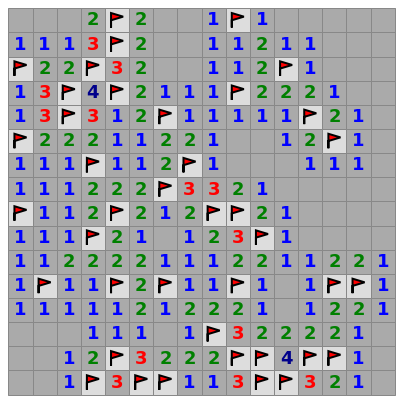

In [ ]:
k = 2
while True:
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para banderas
    agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
    agente.base_conocimiento.TELL(estado_actual)
    lista1 = agente.adyacentes_flags()
    ## Flag si son bombas
    for i,j in lista1:
        agente.mundo._toggle_mine_flag(i,j)
           
    ## Mira estado actual
    estado_actual = agente.make_percept_sentence()
    ## Crea reglas para casillas seguras
    agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
    agente.base_conocimiento.TELL(estado_actual)
    lista2 = agente.adyacentes_seguras()
    ## Clicks si son seguras
    for i,j in lista2:
        agente.mundo._click_square(i,j)
        
    ## Si no hace nada se escoge una aleatoria
    if len(lista1)==0 & len(lista2)==0:
        if len(agente.casillas_aleatoria()) != 0:
            i,j = random.choice(list(agente.casillas_aleatoria()))
            agente.mundo._click_square(i,j)
        elif len(agente.casillas_evaluar()) != 0:
            i,j = random.choice(list(agente.casillas_evaluar()))
            agente.mundo._click_square(i,j)
    
    ## Dibuja tablero
    #ms.fig.canvas.draw()
    #sleep(1)
    #clear_output(wait=True)
    agente.mundo.fig.savefig("tablero{0}x{1}/tablero{0}x{1}_{2}.png".format(filas, columnas, k))
    k += 1
    if agente.mundo.game_over == True:
        if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
            print('Ganaste!')
        else:
            print('Perdiste!')
        break

ms.fig

## Animación

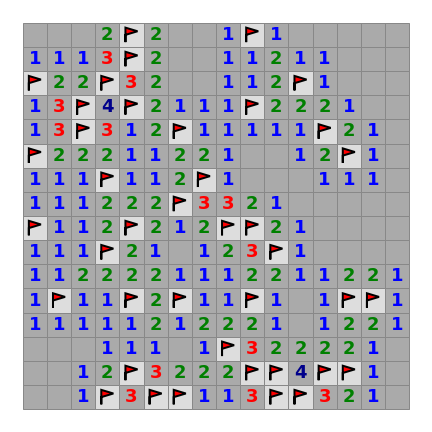

In [ ]:
def animacion(n):
    carp = 'tablero{0}x{0}/'.format(n)
    cont = os.listdir(carp)
    imgs = sorted(sorted(cont), key = lambda x: len(x))
    for img in imgs:
        clear_output(wait = True)
        display(Image.open(carp + img))
        sleep(3)

animacion(16)

## Análisis del Método

In [ ]:
%%capture

results = []
rounds = 100
for n in range(5, 11):
    # print('Tablero {0}x{1}:'.format(n, n))
    ganados = 0
    perdidos = 0
    tiempos = 0
    turnos = 0
    for g in range(rounds):
        # Tablero Inicial
        begin = time()
        info = 6
        filas = n
        columnas = n
        minas = int((filas * columnas) * 0.16)
        IenCasilla = Descriptor([columnas, filas, info])
        ms = MineSweeper(filas, columnas, minas)
        agente = Agente(ms, descriptor=IenCasilla)
        i,j = random.choice(list(agente.casillas_aleatoria()))
        agente.mundo._click_square(i,j)
        # clear_output(wait = True)
        t = 1
        while True:
            ## Mira estado actual
            estado_actual = agente.make_percept_sentence()
            ## Crea reglas para banderas
            agente.base_conocimiento = LPQuery(agente.crear_formulas_flags())
            agente.base_conocimiento.TELL(estado_actual)
            lista1 = agente.adyacentes_flags()
            ## Flag si son bombas
            for i,j in lista1:
                agente.mundo._toggle_mine_flag(i,j)
                
            ## Mira estado actual
            estado_actual = agente.make_percept_sentence()
            ## Crea reglas para casillas seguras
            agente.base_conocimiento = LPQuery(agente.crear_formulas_seguras())
            agente.base_conocimiento.TELL(estado_actual)
            lista2 = agente.adyacentes_seguras()
            ## Clicks si son seguras
            for i,j in lista2:
                agente.mundo._click_square(i,j)
                
            ## Si no hace nada se escoge una aleatoria
            if len(lista1)==0 & len(lista2)==0:
                if len(agente.casillas_aleatoria()) != 0:
                    i,j = random.choice(list(agente.casillas_aleatoria()))
                    agente.mundo._click_square(i,j)
                elif len(agente.casillas_evaluar()) != 0:
                    i,j = random.choice(list(agente.casillas_evaluar()))
                    agente.mundo._click_square(i,j)
            
            t += 1

            if agente.mundo.game_over == True:
                if agente.mundo.mines.sum() == (~agente.mundo.clicked).sum():
                    #print('Ganaste!')
                    ganados += 1
                else:
                    #print('Perdiste!')
                    perdidos += 1
                break
        end = time()
        tiempos += end - begin
        turnos += t
        # print('  Ronda {0}'.format(g + 1))
    # print()
    results.append((n, ganados, perdidos, tiempos / rounds, turnos / rounds))
        

In [ ]:
for r in results:
    print(r)

(5, 52, 48, 0.3063257956504822, 4.93)
(6, 64, 36, 0.5596313142776489, 5.64)
(7, 57, 43, 1.0291175103187562, 6.78)
(8, 40, 60, 2.2998457622528075, 6.8)
(9, 48, 52, 5.858246333599091, 7.65)
(10, 39, 61, 9.76101463317871, 9.36)


In [ ]:
accuracy = [i[1]/rounds for i in results]
print(accuracy)

[0.52, 0.64, 0.57, 0.4, 0.48, 0.39]


In [ ]:
df = pd.DataFrame()
df['Dimensión'] = [i[0] for i in results]
df['Ganadas'] = [i[1] for i in results]
df['Perdidas'] = [i[2] for i in results]
df['Tiempo'] = [i[3] for i in results]
df['Turno'] = [i[4] for i in results]
df['Score'] = accuracy
df.style.set_caption('Tabla de Rendimiento Promedio \n para diferentes tableros (100 rondas)')
df

,Dimensión,Ganadas,Perdidas,Tiempo,Turno,Score
0,5,52,48,0.306326,4.93,0.52
1,6,64,36,0.559631,5.64,0.64
2,7,57,43,1.029118,6.78,0.57
3,8,40,60,2.299846,6.80,0.40
4,9,48,52,5.858246,7.65,0.48
5,10,39,61,9.761015,9.36,0.39


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc91f887-ddd9-402c-9859-1c4cf0158620' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>